Goal of this task is to do the exploratory data analysis of all the time national football games result.

In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
#Load and show main dataframe
df = pd.read_csv('archive/results.csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


<h1>Data cleaning</h1>

In [4]:
def date_changing(date):
    """Converting date format from string to datetime"""
    try:
        result = datetime.strptime(date,'%Y-%m-%d')
    except ValueError:
        result = np.NaN
    return result

In [5]:
#Converting date format from string to datetime
df["date"] = df["date"].apply(date_changing)

In [6]:
#Converting scores from floats to integers:
df["home_score"] = df["home_score"].astype(pd.Int64Dtype())
df["away_score"] = df["away_score"].astype(pd.Int64Dtype())

In [7]:
#Dataframe info after cleaning:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44152 entries, 0 to 44151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44152 non-null  datetime64[ns]
 1   home_team   44152 non-null  object        
 2   away_team   44152 non-null  object        
 3   home_score  44104 non-null  Int64         
 4   away_score  44104 non-null  Int64         
 5   tournament  44152 non-null  object        
 6   city        44152 non-null  object        
 7   country     44152 non-null  object        
 8   neutral     44152 non-null  bool          
dtypes: Int64(2), bool(1), datetime64[ns](1), object(5)
memory usage: 2.8+ MB


<h1>Analysis</h1>

<h5>The highest scores all the time. The highest home and away score.</h5>

In [8]:
df[df["home_score"] == df["home_score"].max()]
    

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
24124,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [9]:
df[df["away_score"] == df["away_score"].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
27701,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


<h5>Average goals per game:</h5>

In [10]:
df["sum_goals"] = df["away_score"] + df["home_score"]
df["sum_goals"].mean().round(1)

2.9

<h5>Average goals per game in each decade</h5>

In [11]:
#Adding new column to simply visualise year of played game
df["year"] = df["date"].apply(lambda x: datetime.date(x).year)

In [12]:
decades = list(range(1880, 2030, 10))
list_of_means, which_decade = [], []
for idx, decade in enumerate(decades):
    try:
        mean_by_decade = df[(df["year"]>decade) & 
                        (df["year"]<decades[idx+1])]["sum_goals"].mean()
        list_of_means.append(mean_by_decade)
        which_decade.append(str(decade) + "-" + str(decades[idx+1]))
    except IndexError:
        pass

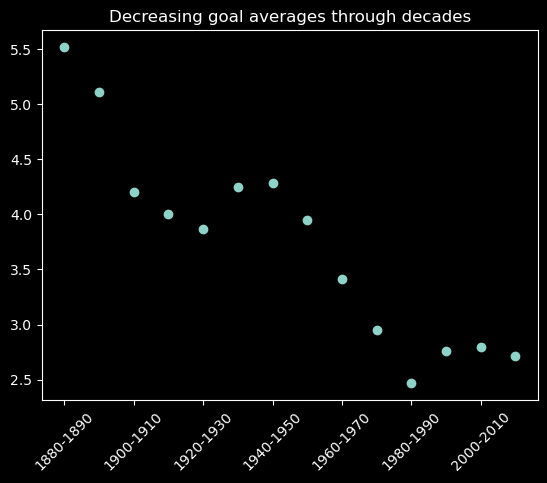

In [13]:
plt.scatter(which_decade, list_of_means)
plt.xticks(np.array(which_decade[::2]), rotation=45) #reducing number of xticks, as they were illegible
plt.title("Decreasing goal averages through decades");

<h5>How many times home team is the winner:</h5>

In [14]:
#Iterating through columns to count home winners and draws all the time. 
#It's important to add second condition, as we have to exclude neutral games.
home_winner_counter, draw_counter, home_losts_counter = 0, 0, 0
for idx, row in df.iterrows():
    try:
        if (row["home_score"] > row["away_score"]) & (not row["neutral"]):
            home_winner_counter += 1
        elif row["home_score"] == row["away_score"] & (not row["neutral"]):
            draw_counter += 1
        elif row["home_score"] < row["away_score"] & (not row["neutral"]):
            home_losts_counter += 1  
    except TypeError:
        pass

In [15]:
#Finding number of all games
all_games_number = df["home_score"].dropna().count()
all_games_number

44104

In [16]:
#How many times the winner is a home team:
home_winner_counter

16777

In [17]:
#Draws in national football history all the time
draw_counter

11849

In [18]:
#Home team lost in national
home_losts_counter

3055

Home team was a winner in 16777 games of 44104, which is 38.0%.
There were 11849 draws, which is 27.0%.
Home team lost 3055 times, which is 7.0%.


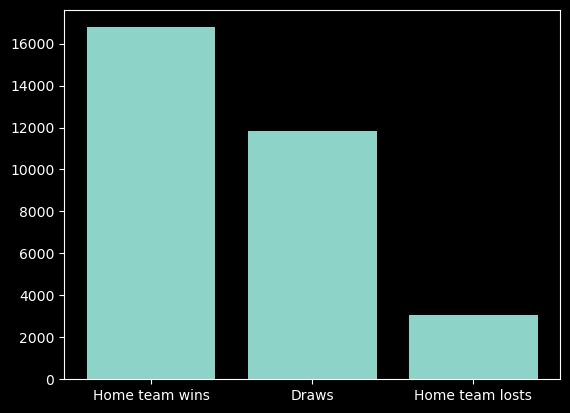

In [19]:
plt.bar(x = ["Home team wins", "Draws", "Home team losts"], 
        height = [home_winner_counter, draw_counter, home_losts_counter]);
print(f"Home team was a winner in {home_winner_counter} games " 
      f"of {all_games_number}, which is {(home_winner_counter/all_games_number).round(2)*100}%.\n"
      f"There were {draw_counter} draws, which is {(draw_counter/all_games_number).round(2)*100}%.\n"
     f"Home team lost {home_losts_counter} times, which is "
     f"{(((home_losts_counter)/all_games_number)*100).round()}%.")

<h5>Number of played matches depending on the year:</h5>

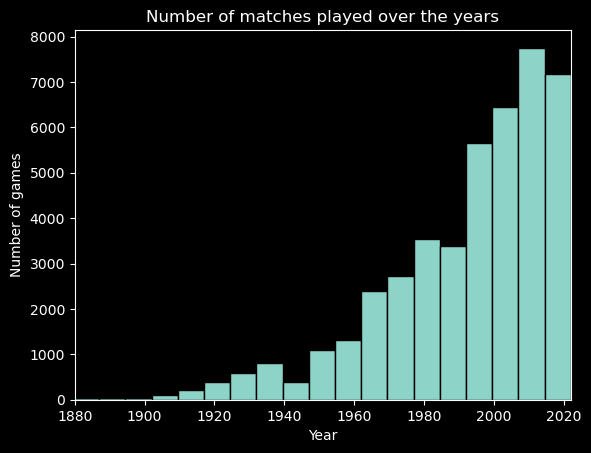

In [20]:
plt.hist(df["year"], bins=20, edgecolor="black")
current_date = datetime.now().year
plt.xlim([1880, current_date])
plt.xlabel("Year")
plt.ylabel("Number of games");
plt.title("Number of matches played over the years");

<h5>Number of played games depending on season</h5>

In [21]:
#Month to season compression
seasons = {
            1: "winter",
            2: "spring",
            3: "summer",
            4: "autumn"
          }
def month_to_season(date):
    month = date.month #extract month from datetime
    season = month%12 // 3 + 1 #math function converting month -> season
    return seasons.get(season)

In [22]:
df["season"] = df["date"].apply(month_to_season)

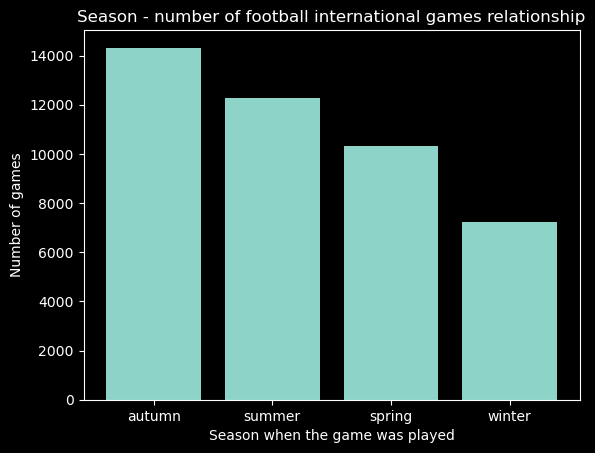

In [23]:
plt.bar(df["season"].value_counts().index, df["season"].value_counts())
plt.xlabel("Season when the game was played")
plt.ylabel("Number of games")
plt.title("Season - number of football international games relationship");

<h5>The team that plays the most</h5>

In [24]:
df["home_team"].value_counts().idxmax() #home team

'Brazil'

In [25]:
df["away_team"].value_counts().idxmax() #away team

'Uruguay'

<h4>Per region anylsis</h4>

In [26]:
#load database that contains list of countries related to regions
df_countries = pd.read_csv('archive/continents2.csv') 
UK = ["England", "Scotland", "Wales", "Northern Ireland"] #in previous line database there is United Kingdom

In [27]:
def find_region(country):
    """That's the function that assign continent for the country"""
    if country in list(df_countries["name"]):
        return df_countries[df_countries["name"]==country]["region"].iloc[0]
    elif country in UK:
        return "Europe"

In [28]:
df["h_team_region"] = df["home_team"].apply(find_region)
df["a_team_region"] = df["away_team"].apply(find_region)

How often matches are intercontinentail

In [29]:
cont_counter = 0
for idx, row in df.iterrows():
    if row["h_team_region"] == row["a_team_region"]:
        cont_counter += 1

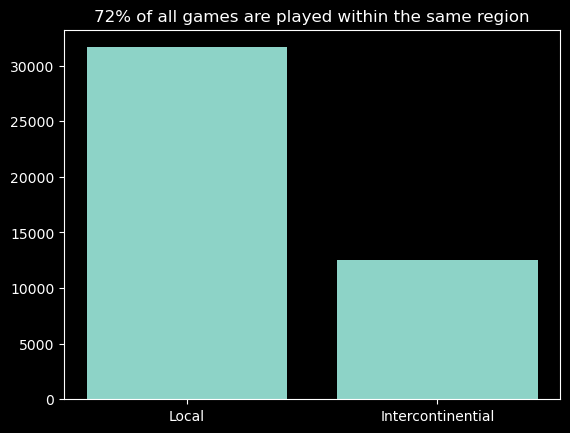

In [30]:
plt.bar(["Local", "Intercontinential"], [cont_counter, df.shape[0]-cont_counter])
plt.title(str(round(cont_counter/df.shape[0]*100)) + 
          "% of all games are played within the same region");

<h3>Tournaments analysis</h3>

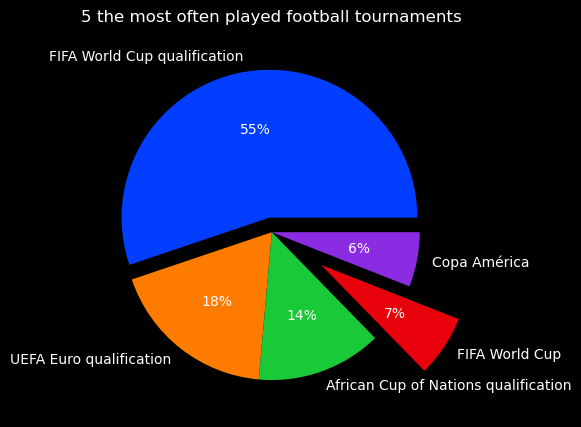

In [31]:
import seaborn
pie_data = list(df["tournament"].value_counts()[1:6].values) #TOP 5 tournaments. Range excluded 0 indx beacouse they're Friendly games

pie_keys = list(df["tournament"].value_counts()[1:6].index) #TOP 5 tournaments. Range excluded 0 indx beacouse they're Friendly games

palette_color = seaborn.color_palette('bright')
explode = [0.1, 0, 0, 0.4, 0] #FIFA World Cup games distinguished

plt.pie(pie_data, labels=pie_keys, colors = palette_color, autopct='%.0f%%', explode=explode)
plt.title("5 the most often played football tournaments\n");

<h5>FIFA World Cup</h5>

In [46]:
df_wc = df[df["tournament"]=="FIFA World Cup"].copy() #filtering only World Cup and creating a new dataframe

In [47]:
df_wc.reset_index(inplace=True) #setting new indexes

In [48]:
wc_years = list(df_wc["year"].unique()) #creating list of years, when WC were played

In [49]:
wc_years = wc_years[:-1] #2022 world cup not finished so far

<h5>World Cup Winners</h5>

In [51]:
def find_winner(row):
    """This function helps to find the winner based on the score"""
    try:
        if row["home_score"] > row["away_score"]:
            return row["home_team"]
        elif row["home_score"] < row["away_score"]:
            return row["away_team"]
        else:
            pass
    except TypeError:
        pass

In [52]:
df_wc["winner"] = df_wc.apply(find_winner, axis=1) #adding a new column with name of winner in each game

In [69]:
df_wc["winner"].value_counts()

Brazil                    73
Germany                   67
Italy                     45
Argentina                 43
France                    34
                          ..
Czech Republic             1
Jamaica                    1
Cuba                       1
Wales                      1
Bosnia and Herzegovina     1
Name: winner, Length: 62, dtype: int64

In [84]:
df_wc["winner"].value_counts()[:20]

Brazil            73
Germany           67
Italy             45
Argentina         43
France            34
Spain             30
England           29
Netherlands       27
Uruguay           24
Belgium           20
Sweden            19
Russia            19
Poland            16
Mexico            16
Hungary           15
Portugal          14
Yugoslavia        14
Austria           12
Switzerland       12
Czechoslovakia    11
Name: winner, dtype: int64

TypeError: tuple indices must be integers or slices, not tuple

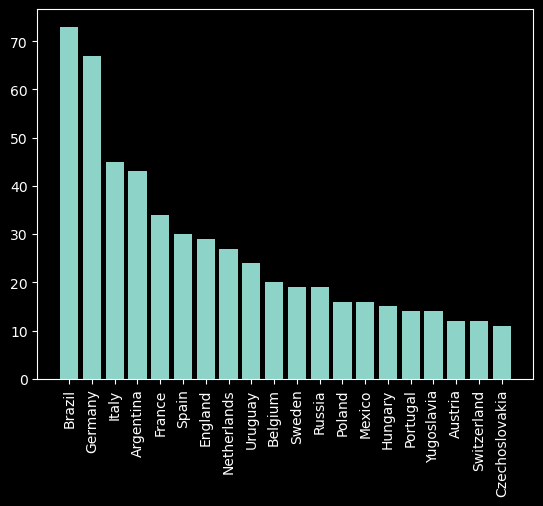

In [99]:
wins_plot = plt.bar(df_wc["winner"].value_counts()[:20].index, df_wc["winner"].value_counts()[:20])
plt.xticks(rotation = 90)
wins_plot[0, 2].set_color(["gold", "silver"])

In [41]:
df_wc[df_wc["year"] == 1950].iloc[-1]

index                           3155
date             1950-07-16 00:00:00
home_team                      Spain
away_team                     Sweden
home_score                         1
away_score                         3
tournament            FIFA World Cup
city                       São Paulo
country                       Brazil
neutral                         True
sum_goals                          4
year                            1950
season                        summer
h_team_region                 Europe
a_team_region                 Europe
winner                        Sweden
Name: 74, dtype: object

In [42]:
wc_winners

['Uruguay',
 'Italy',
 'Italy',
 'Sweden',
 'Germany',
 'Brazil',
 'Brazil',
 'England',
 'Brazil',
 'Germany',
 'Argentina',
 'Italy',
 'Argentina',
 'Germany',
 'Italy',
 'France',
 'Brazil',
 'France',
 'Spain',
 'Germany',
 'France']